In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
from feat_desc import *
import cv2
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,formatter=dict(float=lambda x: "%.3g" % x))
from corner_detector import *
from anms import *
from feat_match import *
from ransac_est_homography import *

max_anms=4000

In [2]:
# img1=cv2.imread('small-right.jpg')
img1=cv2.imread('middle.jpg')
# img1=cv2.imread('case1.png')
# img1=cv2.imread('rot-middle.jpg')
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))
x,y,rmax=anms(c, max_anms)

d1 = feat_desc(gray,x,y)
kp1=[]
for (_x,_y) in zip(x,y):
    kp1.append(cv2.KeyPoint(_x,_y,40))


177412
138996


In [3]:
# img2=cv2.imread('small-middle.jpg')
img2=cv2.imread('right.jpg')
# img2=cv2.imread('case2.png')
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))

x,y,rmax=anms(c, max_anms)
d2 = feat_desc(gray,x,y)
kp2=[]
for (_x,_y) in zip(x,y):
    kp2.append(cv2.KeyPoint(_x,_y,40))


132258
103047


In [4]:
m,dMatch=feat_match(d1, d2)
x1=[]
y1=[]
x2=[]
y2=[]
for k,idx in enumerate(m):
    if (idx != -1):
        # is 0 x or 1 x?
        x1.append(kp1[idx].pt[0])
        y1.append(kp1[idx].pt[1])
        x2.append(kp2[k].pt[0])
        y2.append(kp2[k].pt[1])
# print(x1)
# print(x2)
# print(len(dMatch))
print(x1)
print(y1)
print(x2)
print(y2)
x1=np.array(x1)
x2=np.array(x2)
y1=np.array(y1)
y2=np.array(y2)

[3115.0, 764.0, 775.0, 1352.0, 1924.0, 3198.0, 649.0, 2518.0, 1958.0, 2628.0, 2874.0, 3471.0, 2998.0, 3716.0, 519.0, 3925.0, 1675.0, 1880.0, 3263.0, 238.0, 3081.0, 1932.0, 1595.0, 1164.0, 1169.0, 3637.0, 3975.0, 2003.0, 2953.0, 3130.0, 1913.0, 3161.0, 1754.0, 273.0, 3834.0, 3170.0, 3263.0, 238.0, 2991.0, 48.0, 421.0, 2647.0, 3653.0, 3834.0, 2581.0, 3438.0, 2227.0, 871.0, 3079.0, 2032.0, 3076.0, 2138.0]
[587.0, 2190.0, 504.0, 2229.0, 540.0, 2709.0, 1192.0, 2949.0, 1831.0, 2562.0, 2645.0, 1293.0, 1996.0, 664.0, 1818.0, 465.0, 2529.0, 2931.0, 1461.0, 3014.0, 2694.0, 2849.0, 2862.0, 2794.0, 2159.0, 611.0, 2179.0, 1313.0, 741.0, 11.0, 2596.0, 46.0, 3015.0, 1938.0, 447.0, 1386.0, 1461.0, 3014.0, 115.0, 1599.0, 1533.0, 2528.0, 2380.0, 447.0, 1004.0, 2728.0, 982.0, 2378.0, 1770.0, 2294.0, 1124.0, 1237.0]
[2554.0, 732.0, 937.0, 1884.0, 680.0, 2418.0, 956.0, 2197.0, 293.0, 3794.0, 934.0, 3271.0, 3946.0, 763.0, 2899.0, 2160.0, 901.0, 3639.0, 1202.0, 3046.0, 308.0, 3884.0, 2903.0, 727.0, 3813.0, 3

In [24]:
e

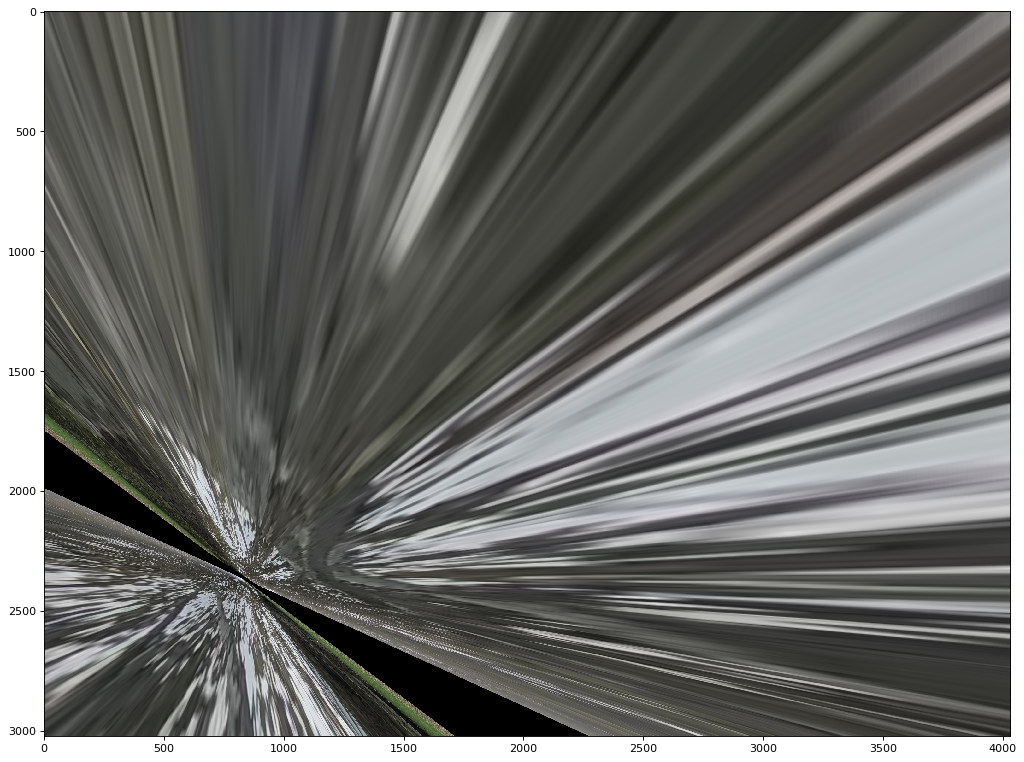

In [31]:

result = cv2.warpPerspective(img1, H,(int(img1.shape[1]), int(img1.shape[0])))#,flags=cv2.INTER_LINEAR)
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
mask = np.array(inlier_ind, dtype=bool)

mfilter = []
for idx,i in enumerate(mask):
    if i == True:
        mfilter.append(dMatch[idx])

In [23]:
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
print(len(mfilter))
# f=cv2.drawMatches(img1, kp1, img2, kp2, mfilter, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
f=cv2.drawMatches(img1, kp1, img2, kp2, dMatch, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

4


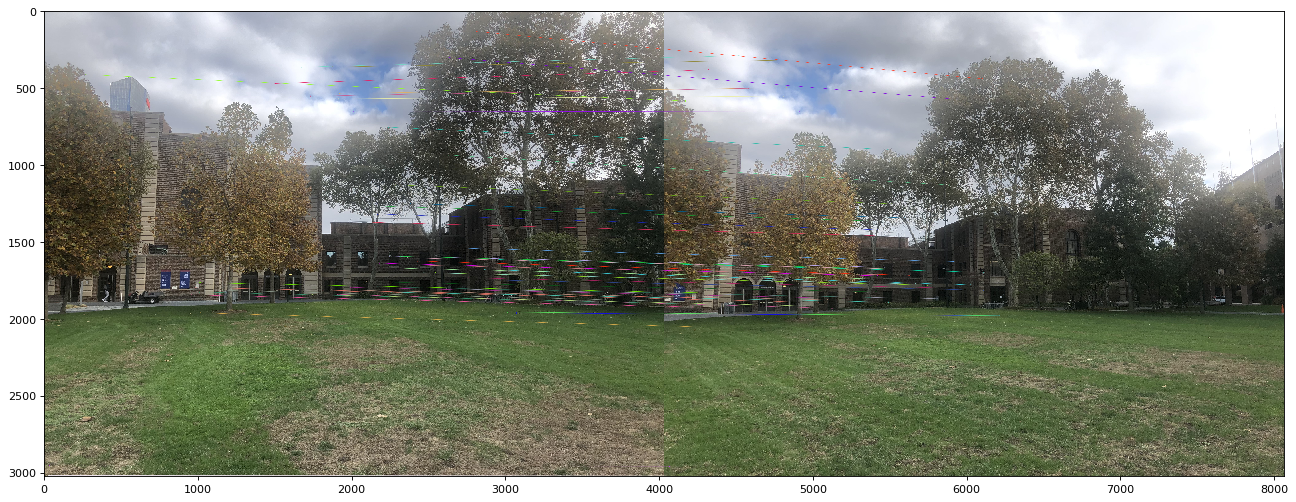

In [19]:
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.scatter(x, y)
plt.axis('off')

NameError: name 'img' is not defined

<Figure size 1280x960 with 0 Axes>

In [ ]:
d = feat_desc(gray,x,y)

In [ ]:
# x_,y_ = np.meshgrid(np.arange(img1.shape[1]),np.arange(img1.shape[0]))
# pts_set = np.vstack(([x_.flatten()],[y_.flatten()],np.ones(len(x_.flatten()))))
# print(pts_set)
# stk = H@pts_set
# inds = np.ravel_multi_index(stk.astype('int'),(img1.shape[1], img1.shape[0]))
# flat_img = img1.reshape((img1.shape[0]*img1.shape[1],3))
# res_img = flat_img[inds]
# res_img = res_img.reshape((im.shape[0],im.shape[1],3))
# plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))


In [ ]:
for i in d:
    print(i)

In [ ]:
x = [[4,5,6],[1,2,3]]
res=np.linalg.norm(x,axis=1)
res.argsort()
print(res.argsort())

In [ ]:
x[-1]

In [ ]:
print(H)
mask = np.array(inlier_ind, dtype=bool)
# print(mask)
# print(x1*mask)
# print(y1*mask)
stack = np.vstack((x1*mask,y1*mask,np.ones((x1.shape))))
res = H@stack
print("-1:",end=" ")
print(res/res[-1])
print("reg:",end=" ")
print(res[0]/res[2])

stack = np.vstack((x2*mask,y2*mask,np.ones((x1.shape))))
print(stack)

In [ ]:
#img.shape[1],img.shape[0]
x,y = np.meshgrid(np.arange(100),np.arange(50))
pts_set = np.vstack(([x.flatten()],[y.flatten()],np.ones(len(x.flatten()))))

In [ ]:
x1 = np.array([-1,-1,1,1,0,0,                     90,222,88])
y1 = np.array([1,-1,-1,1,0,1,                     12321,33,1])
x2 = np.array([0,-2**0.5,0,2**0.5,0,0.5*(2**0.5), 777,3,4])
y2 = np.array([2**0.5,0,-2**0.5,0,0,0.5*(2**0.5), 2,9,999])


In [ ]:
for i in range(100):
    H, inlier_ind=ransac_est_homography(x1,y1,x2,y2,0.5)


In [ ]:
print(inlier_ind)
print(H)

In [ ]:
# p1 = [(88,1),(-1,1),(1,1),(1,-1)]
# p2 = [(4,999),(0,2**0.5),(2**0.5,0),(2**0.5,-2**0.5)]
x1 = np.array([-1,-1,1,1,0,0,                     90,222,88])
y1 = np.array([1,-1,-1,1,0,1,                     12321,33,1])
x2 = np.array([0,-2**0.5,0,2**0.5,0,0.5*(2**0.5), 777,3,4])
y2 = np.array([2**0.5,0,-2**0.5,0,0,0.5*(2**0.5), 2,9,999])
# [8, 0, 3, 2]
pts=[0,5,3,8]
p1 = [(x1[pts[0]],y1[pts[0]]),(x1[pts[1]],y1[pts[1]]),(x1[pts[2]],y1[pts[2]]),(x1[pts[3]],y1[pts[3]])]
p2 = [(x2[pts[0]],y2[pts[0]]),(x2[pts[1]],y2[pts[1]]),(x2[pts[2]],y2[pts[2]]),(x2[pts[3]],y2[pts[3]])]
print(p2)
pointsTotal = len(p1)

A = np.zeros((8,9))
# Homography matrix
for i in range(4): # Using the corners
        A[i*2,:] = [ p1[i][1], p1[i][0], 1, 0, 0, 0, -p2[i][1]*p1[i][1], -p2[i][1]*p1[i][0], -p2[i][1] ]
        A[i*2+1,:] = [0, 0, 0, p1[i][1], p1[i][0], 1, -p2[i][0]*p1[i][1], -p2[i][0]*p1[i][0], -p2[i][0] ]


# Alternative (provide worse results)
#[V,W] = np.linalg.eig(np.dot(A.T,A))
#m = W[:,-1]

[U,S,V]=np.linalg.svd(A)
m = V[-1,:]/V[-1,-1]
print(m)
H = np.reshape(m,(3,3))
print(H.T)
# print(p2[2])
pt=3
v=H.T@np.append(p1[pt],1)
v=v/v[-1]
print(v[0:2]-p2[pt])
# It should be close to zero
print("This value should be close to zero: "+str(np.sum(np.matmul(A,m))))

In [ ]:
o=np.array([2.05e-18 6.52e-19 1.4e-18 1.57e-16 2.57e-16 -1.79e-16 1.55e-18 -1 1])